# **Import libraries**

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop

from tensorflow.keras.utils import to_categorical, plot_model
from os import name
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

# **Import Data**

In [2]:
(train_Images,train_labels),(test_Images,test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training image:


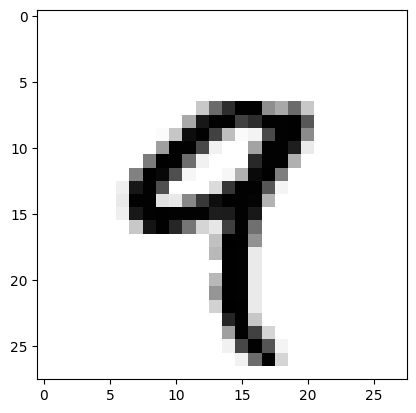

Test image:


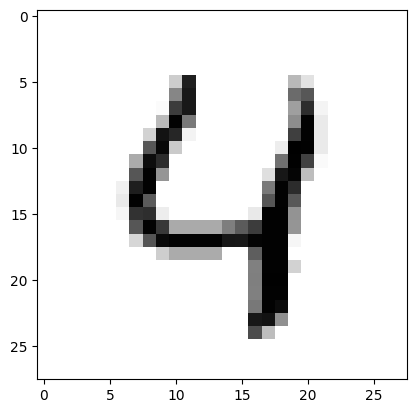

In [3]:
# What mnist images look like
print("Training image:")
plt.imshow(train_Images[4],cmap=plt.cm.binary)
plt.show()
print("Test image:")
plt.imshow(test_Images[4],cmap=plt.cm.binary)
plt.show()

# **EDA (Exploratory Data Analysis)**

In [4]:
train_Images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_Images.shape

(10000, 28, 28)

In [7]:
test_labels.shape

(10000,)

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

# **Visualize Data**

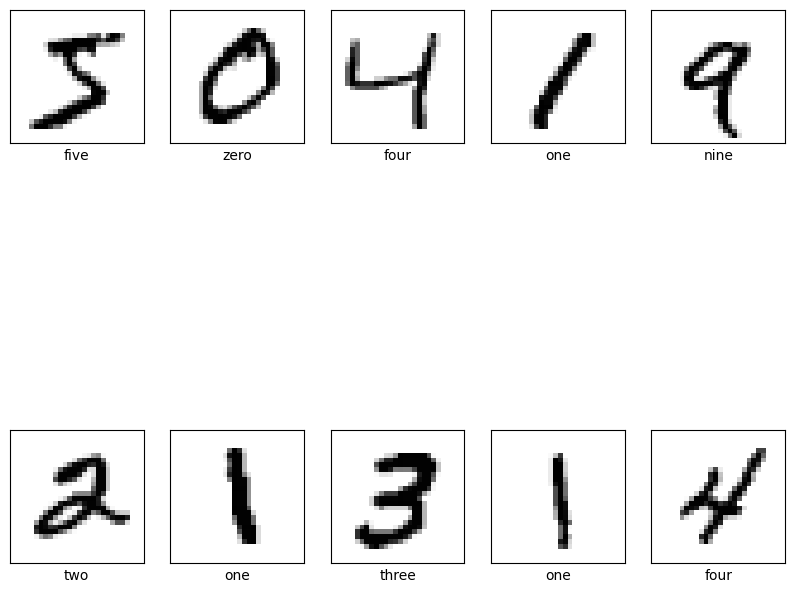

In [12]:
plt.figure(figsize=[10,10])
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_Images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Reshape And Normailze**

In [13]:
# image dimentions
image_size = train_Images.shape[1]
input_size = image_size * image_size
print(input_size) # 28*28


784


In [14]:
# Reshape to have a thrid dimension (Channel)
train_Images = np.reshape(train_Images,(-1,input_size))
test_Images = np.reshape(test_Images,(-1,input_size))
train_Images.shape,test_Images.shape,train_labels.shape,test_labels.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [15]:
# Normalization
train_Images = train_Images.astype("float32") / 255
test_Images = test_Images.astype("float32") / 255

In [16]:
train_Images.shape

(60000, 784)

In [17]:
test_Images.shape

(10000, 784)

In [18]:
train_Images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# **Encoding**

In [19]:
# Network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [20]:
# It's better and safe to use "num_classes=10"
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels,num_classes=10)

# **Model**

In [37]:
# Create model object
model = Sequential()

# Add layers and forming the model
model.add(Dense(hidden_units,input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(10))
model.add(Activation('softmax'))






/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

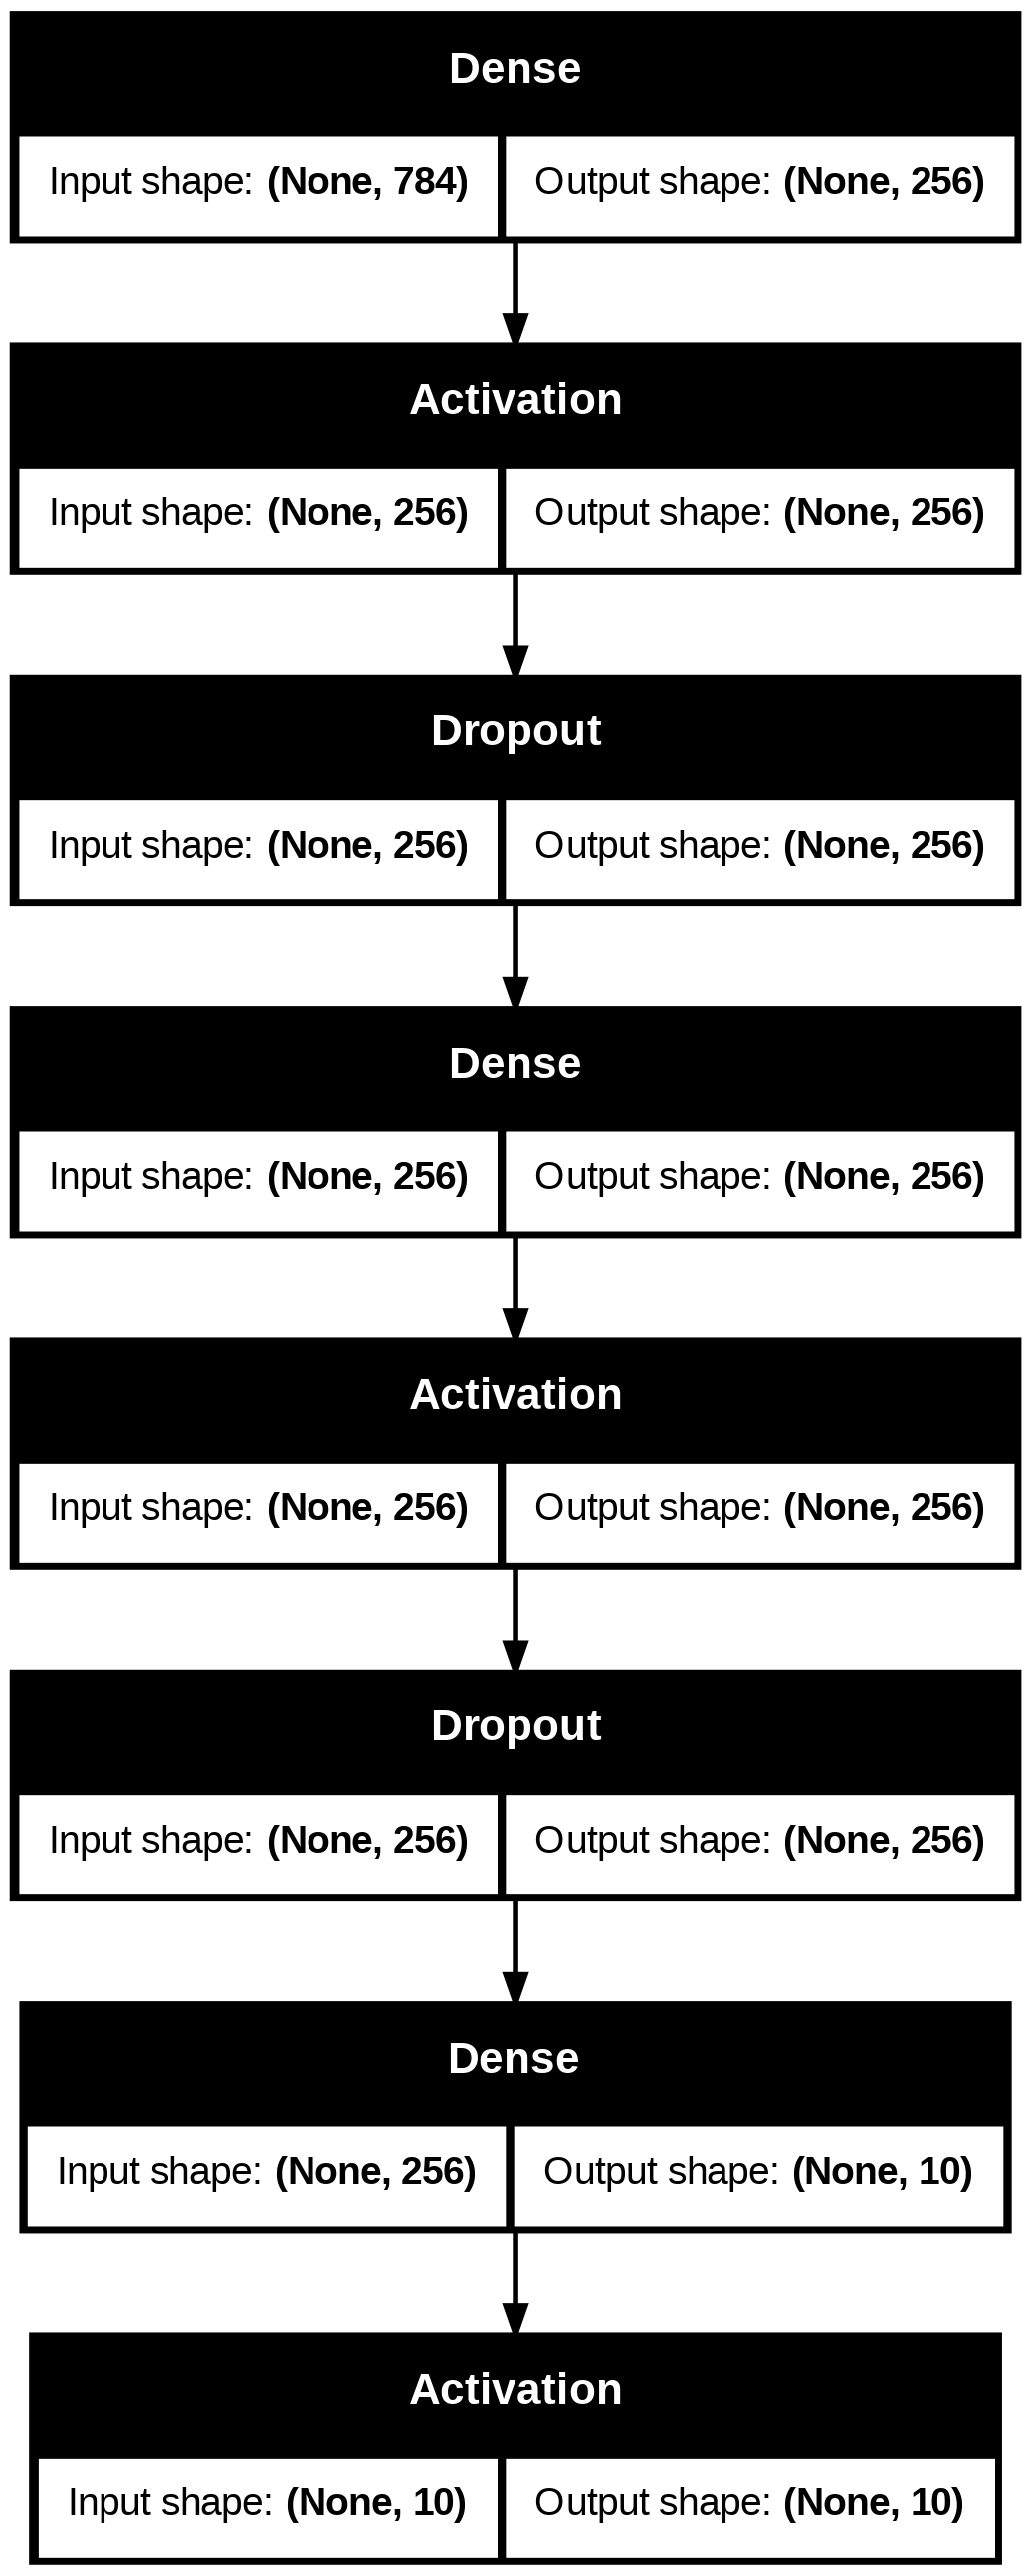

In [39]:
plot_model(model, show_shapes=True)

# **Compilation: loss + optimizer**

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# **Learning**

In [41]:
history = model.fit(train_Images,
          train_labels,
          epochs=20,
          batch_size=batch_size,
          validation_data=(test_Images,test_labels)
          )

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7658 - loss: 0.7265 - val_accuracy: 0.9552 - val_loss: 0.1430
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9386 - loss: 0.2082 - val_accuracy: 0.9647 - val_loss: 0.1125
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.1537 - val_accuracy: 0.9704 - val_loss: 0.0910
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9596 - loss: 0.1301 - val_accuracy: 0.9764 - val_loss: 0.0816
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9645 - loss: 0.1140 - val_accuracy: 0.9765 - val_loss: 0.0761
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.0992 - val_accuracy: 0.9784 - val_loss: 0.0749
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0979 - val_accuracy: 0.9782 - val_loss: 0.0725
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.0889 - val_accuracy: 0.

In [42]:
test_loss,test_acc = model.evaluate(test_Images,test_labels,batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (test_acc * 100))

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9798 - loss: 0.0764

Test accuracy: 98.3%


# **Testing**

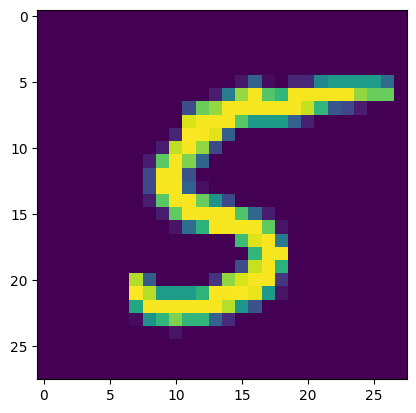

In [55]:
import random
# You can choose the number you want
rand= random.randint(0, 9999)
img = test_Images[rand]
plt.imshow(np.reshape(img,(28,28,1)))
plt.show()

In [56]:
img.shape

(784,)

In [57]:
model.predict(np.reshape(img, (1,img.shape[0])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.1277136e-25, 3.6834631e-20, 5.2964318e-24, 5.8388264e-12,
        1.4281389e-24, 1.0000000e+00, 4.5092920e-18, 5.3368039e-27,
        2.7363323e-15, 1.6568697e-12]], dtype=float32)

In [58]:
np.argmax(model.predict(np.reshape(img,(1,img.shape[0]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


5

In [59]:
print(np.argmax(test_labels[1500]))

7


In [60]:
print('test_acc' , 100*test_acc)

test_acc 98.29000234603882


# Visualization

Text(0.5, 1.0, 'Training and validation loss')

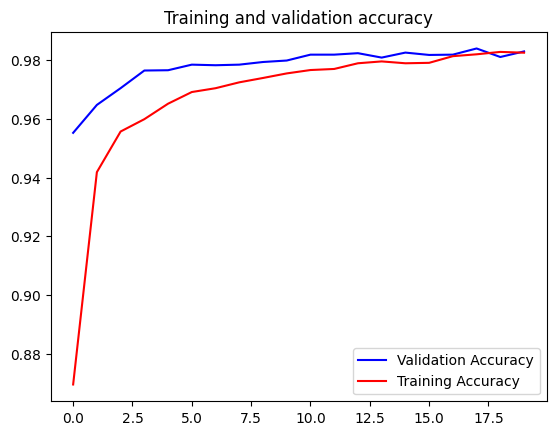

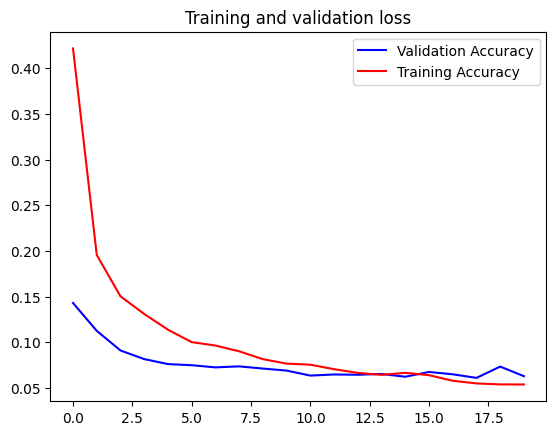

In [53]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc_valid = history.history['val_accuracy']
acc_train = history.history['accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss_valid = history.history['val_loss']
loss_train = history.history['loss']

# Get number of epochs
epochs = range(len(acc_valid))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc_valid, color='blue', label='Validation Accuracy')
plt.plot(epochs, acc_train, color='red', label='Training Accuracy')
plt.legend(loc='best')  # Add a legend to differentiate the lines
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss_valid, color='blue', label='Validation Accuracy')
plt.plot(epochs, loss_train, color='red', label='Training Accuracy')
plt.legend(loc='best')  # Add a legend to differentiate the lines
plt.title('Training and validation loss')